# Health Insurance Claim Predictor

---

## Introduction

### Project Overview
This project aims to identify the health insurance claims of customers based on various features. The analysis is crucial for decreasing the risk fraudulent claims and increasing overall business profitability by optimizing insurance premium.

### Background
The dataset used in this project is a collection of customer and their health information along with their insurance claim. This dataset provides insights into various factors that might influence insurance claim, including healthiness of the customer, their geographic location, and their wealthiness.

### Objectives
- To segment customer profiles.
- To identify what factors greatly impact the insurance claim.
- To predict the insurance claim of customers based on various features.

### Data Description
#### Dataset Overview
The dataset used in this project is sourced from Kaggle's health insurance dataset. It includes 15000 customer records and 13 features.
#### Key Features
- age : Age of the policyholder
- sex: Gender of policyholder
- weight: Weight of the policyholder in kg
- bmi: Body mass index of the policyholder
- hereditary_diseases: A policyholder has a hereditary diseases or not (no-disease=0; disease=1)
- no_of_dependents: Number of dependent persons of the policyholder
- smoker: Indicates policyholder is a smoker or not (non-smoker=0;smoker=1)
- bloodpressure: Blood pressure reading of policyholder
- diabetes: Indicates whether policyholder has diabetes or not (non-diabetic=0; diabetic=1)
- regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1)
- job_title: Job title of the policyholder
- city: The city in which the policyholder resides
- claim: The amount claimed by the policyholder 
#### Data Types
- Categorical: sex, hereditary_diseases, smoker, diabetes, regular_ex, job_title, city
- Numerical: age, weight, bmi, no_of_dependents, bloodpressure, claim

### Prediction
The goal is to predict the insurance claim of customers based on various features.

### Metrics
RMSE: The square root of the average of the squared differences between predicted and actual values.

$RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$

It provides a measure of how well the model's predictions match the actual values. Lower values indicate better accuracy.

### References
1. Dataset Source: [Kaggle Health Insurance Dataset](https://www.kaggle.com/datasets/sureshgupta/health-insurance-data-set/data)

---

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [4]:
data.describe()

age        weight           bmi  no_of_dependents  \
count  14604.000000  15000.000000  14044.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       14.015966     13.701935      6.122950          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.700000          0.000000   
50%       40.000000     63.000000     29.400000          1.000000   
75%       52.000000     76.000000     34.400000          2.000000   
max       64.000000     95.000000     53.100000          5.000000   

             smoker  bloodpressure      diabetes    regular_ex         claim  
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000  
mean       0.198133      68.650133      0.777000      0.224133  13401.437620  
std        0.398606      19.418515      0.416272      0.417024  12148.239619  
min        0.000000       0.000000      0.000000      0.000000   1121.900000  
25%        0.000000      64.000000      1.000000      0.000000   4846.900000  
50%        0.000000      71.000000      1.000000      0.000000   9545.650000  
75%        0.000000      80.000000      1.000000      0.000000  16519.125000  
max        1.000000     122.000000      1.000000      1.000000  63770.400000

In [5]:
# imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# impute age and bmi
imputer = imputer.fit(data[['age', 'bmi']])
data[['age', 'bmi']] = imputer.transform(data[['age', 'bmi']])

In [6]:
# winsorizer
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['bloodpressure', 'claim'])

data[['bloodpressure', 'claim']] = winsorizer.fit_transform(data[['bloodpressure', 'claim']])

In [7]:
data.describe()

age        weight           bmi  no_of_dependents  \
count  15000.000000  15000.000000  15000.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       13.829705     13.701935      5.924606          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.900000          0.000000   
50%       40.000000     63.000000     29.800000          1.000000   
75%       51.000000     76.000000     34.100000          2.000000   
max       64.000000     95.000000     53.100000          5.000000   

             smoker  bloodpressure      diabetes    regular_ex         claim  
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000  
mean       0.198133      70.600800      0.777000      0.224133  12543.004248  
std        0.398606      13.103514      0.416272      0.417024  10073.193516  
min        0.000000      40.000000      0.000000      0.000000   1121.900000  
25%        0.000000      64.000000      1.000000      0.000000   4846.900000  
50%        0.000000      71.000000      1.000000      0.000000   9545.650000  
75%        0.000000      80.000000      1.000000      0.000000  16519.125000  
max        1.000000     104.000000      1.000000      1.000000  34027.462500

In [8]:
import sweetviz as sv

/home/hpark/Syncthing/Professional/DS_Projects/Health_Insurance_Claim/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



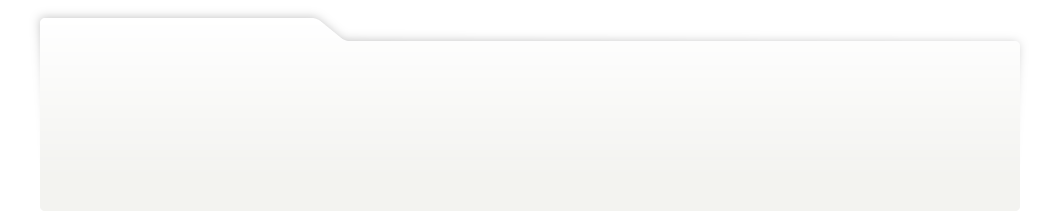
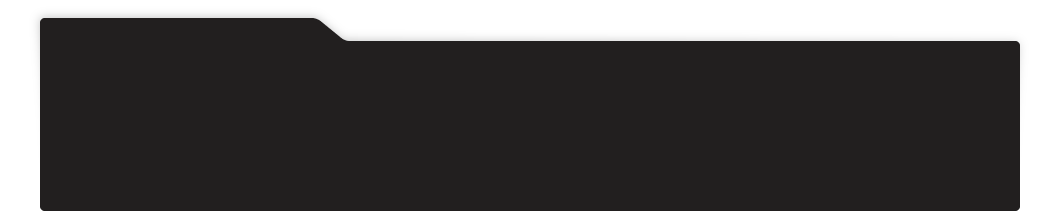
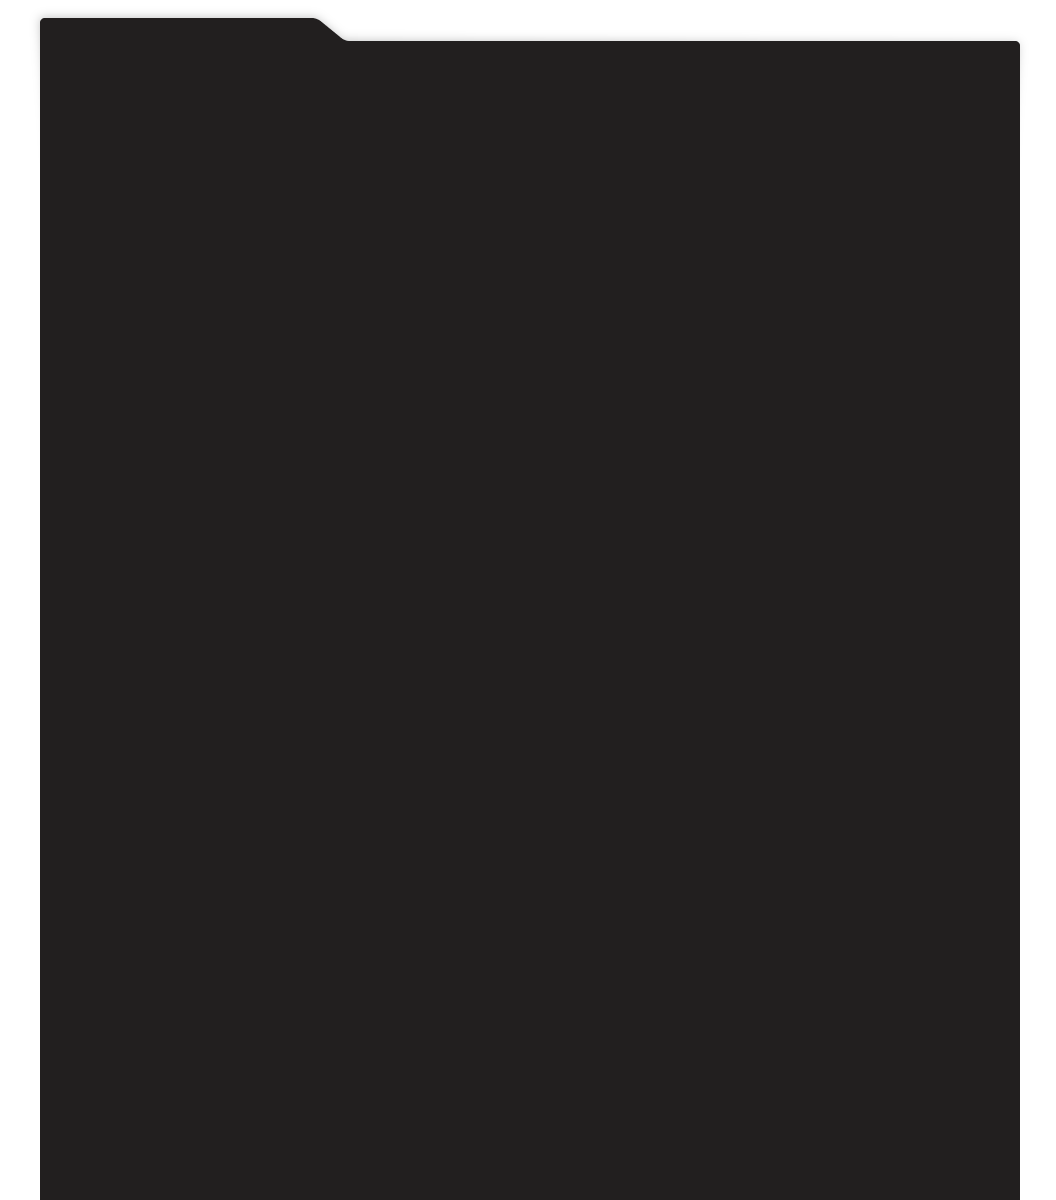
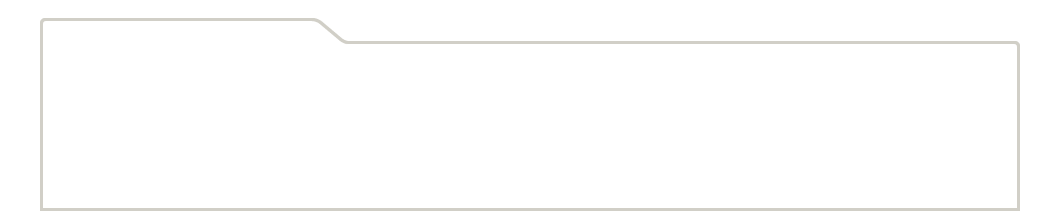
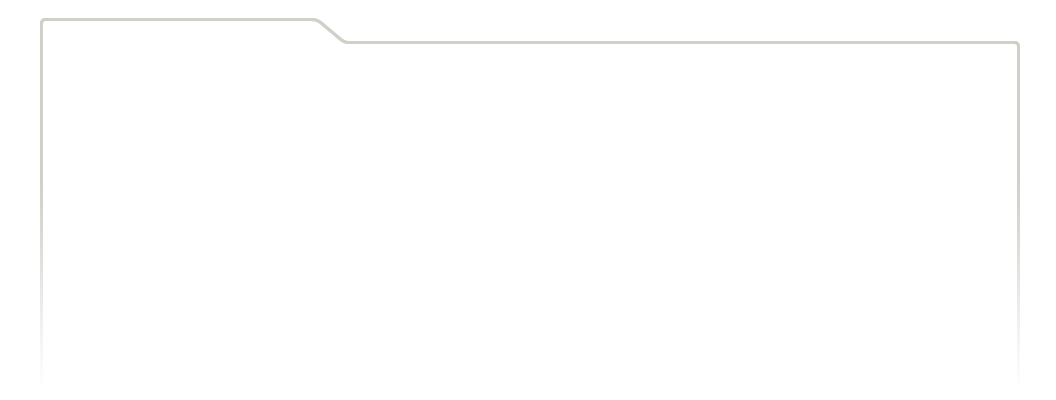
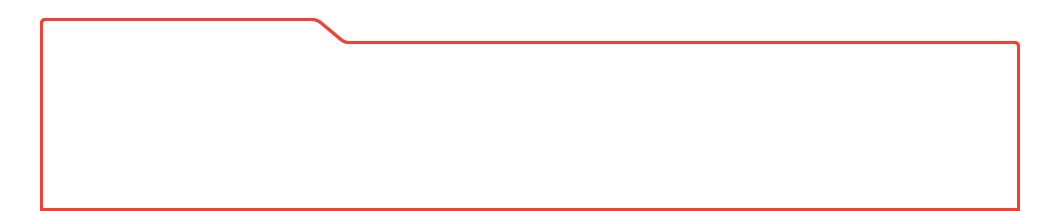
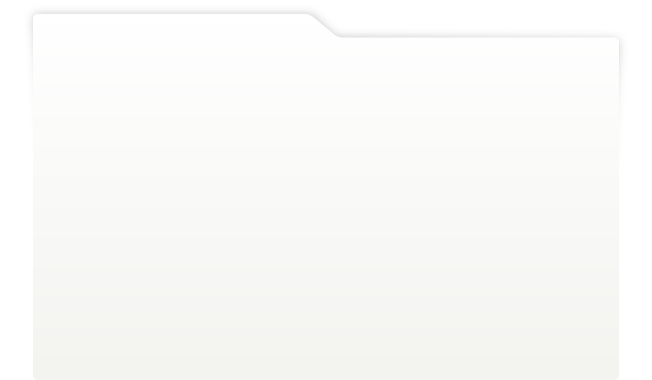
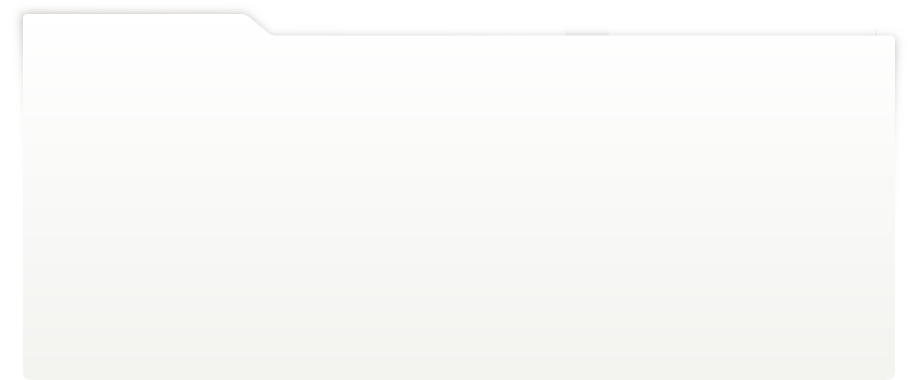
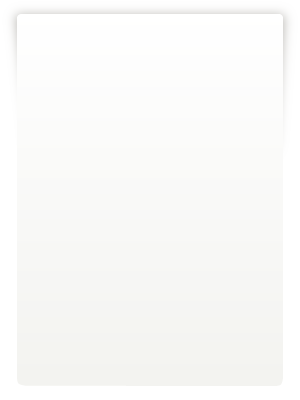
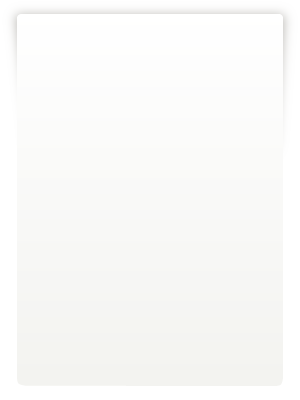
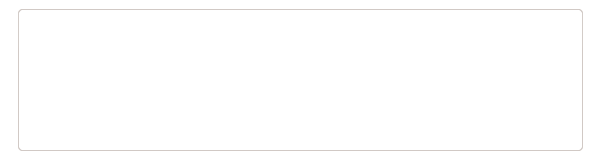
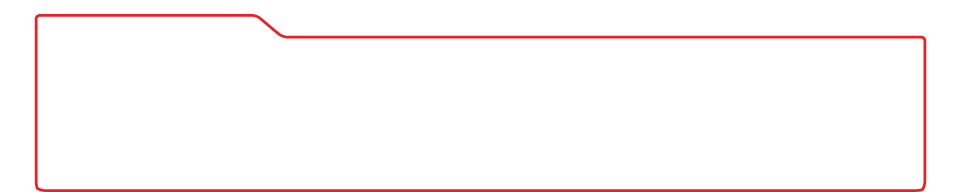
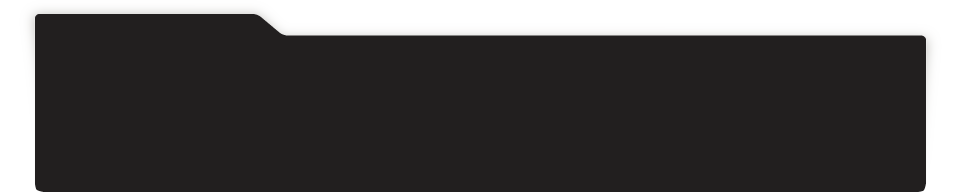
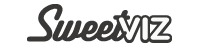
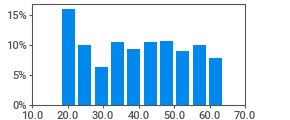
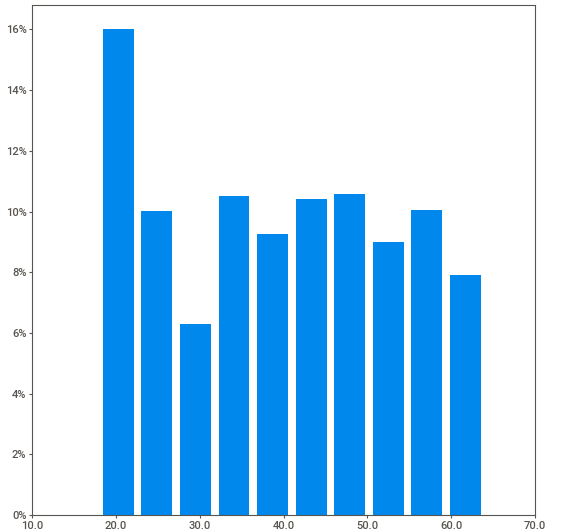
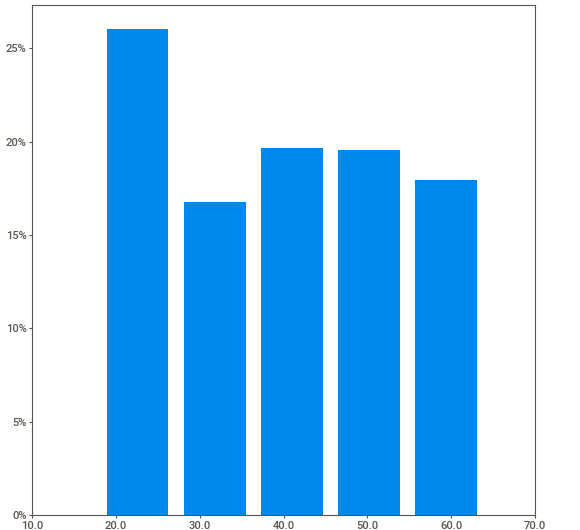
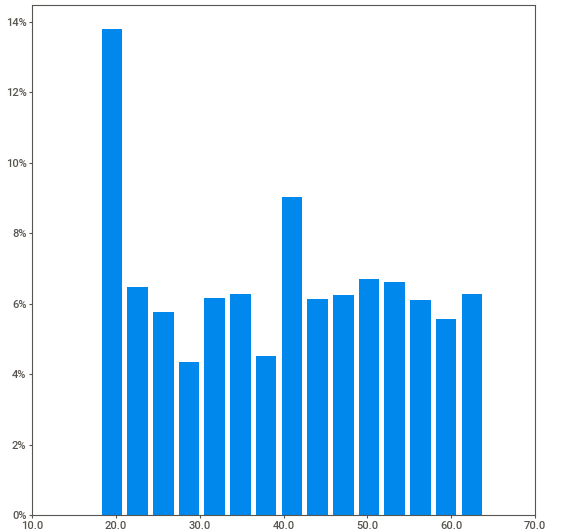
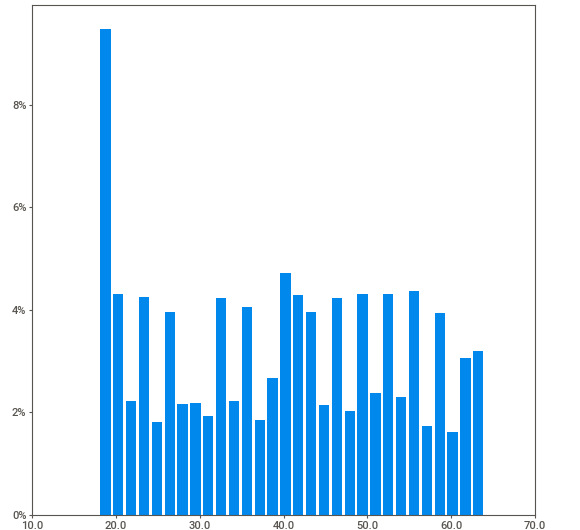
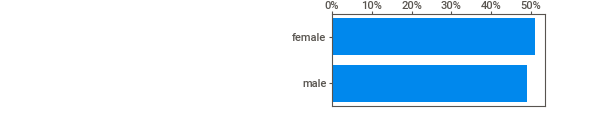
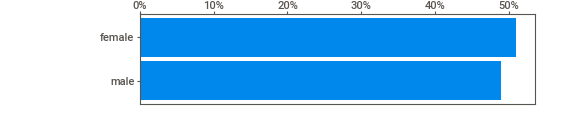
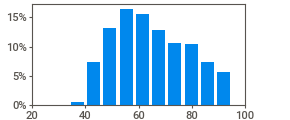
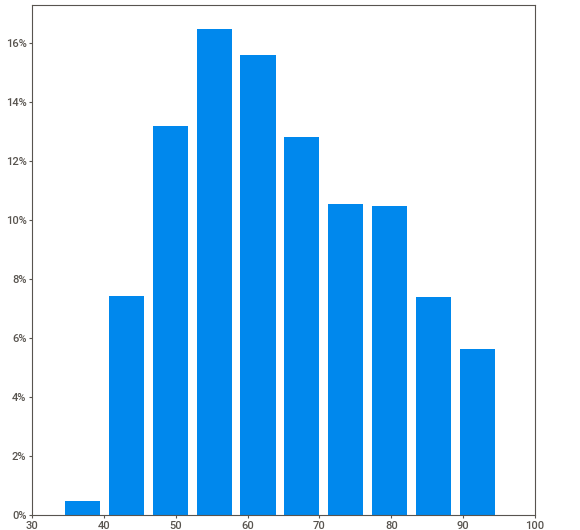
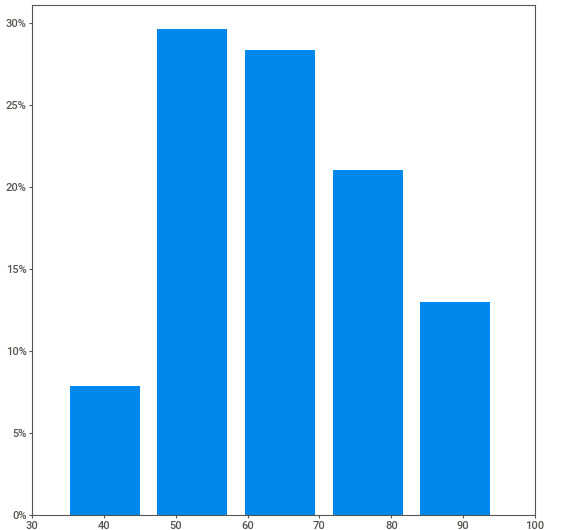
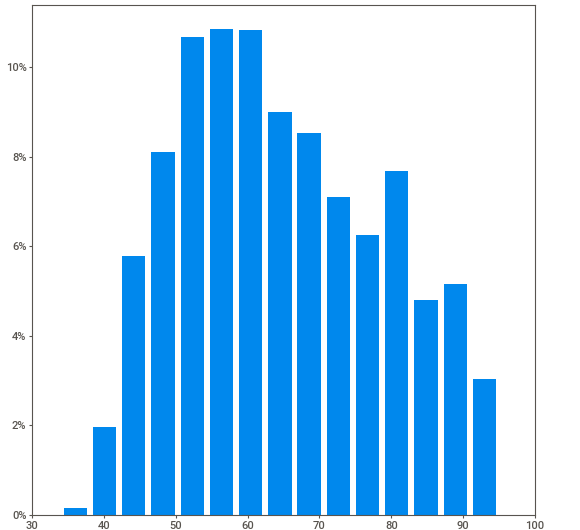
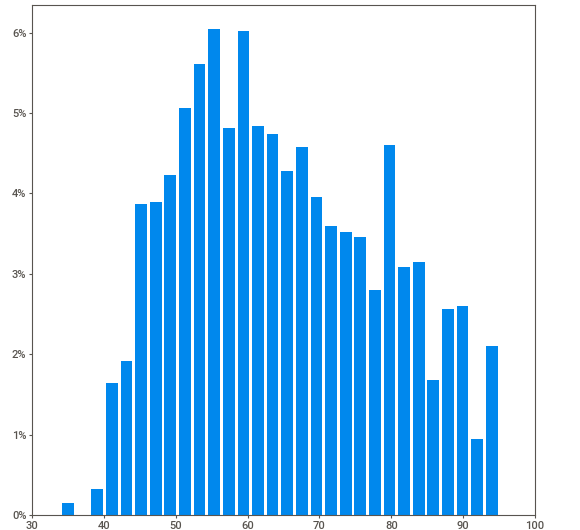
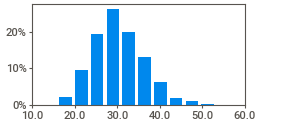
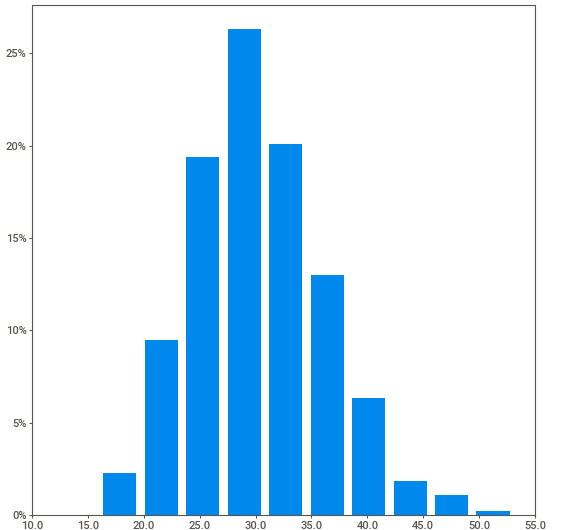
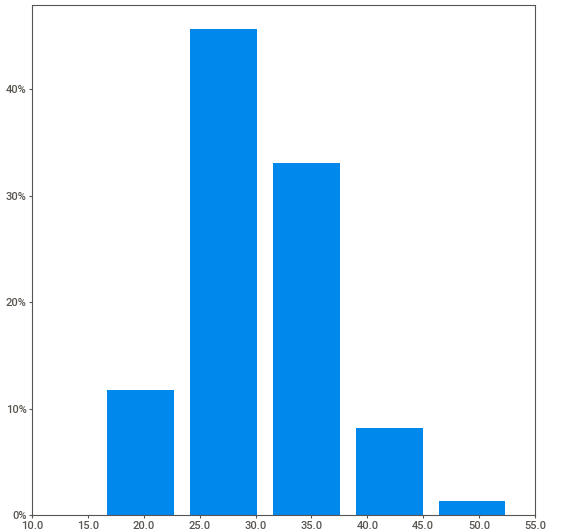
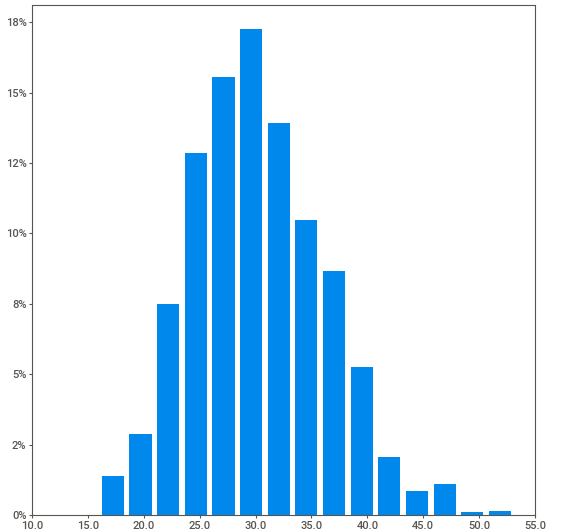
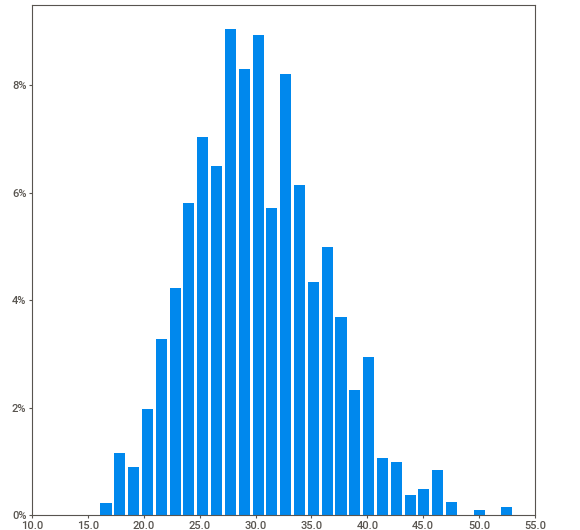
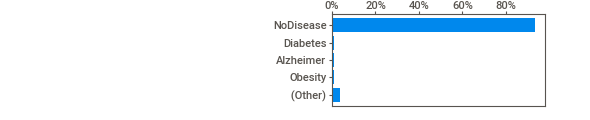
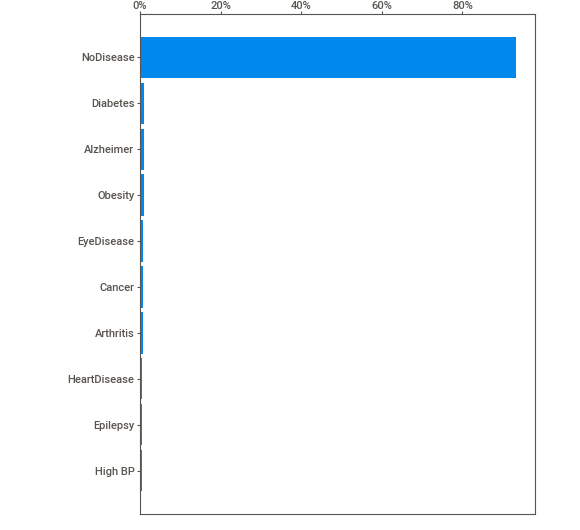
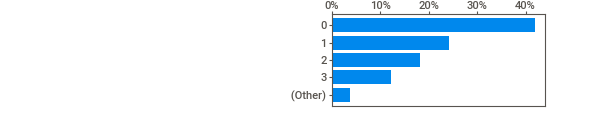
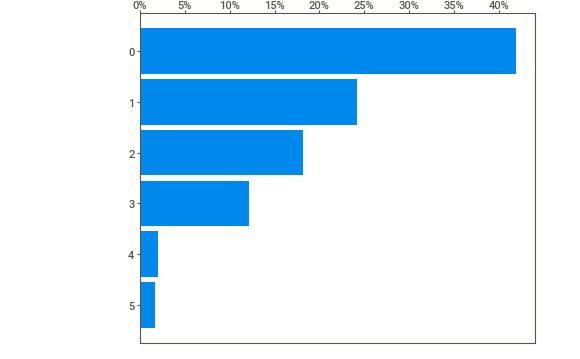
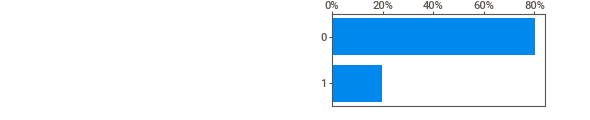
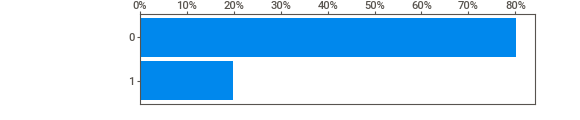
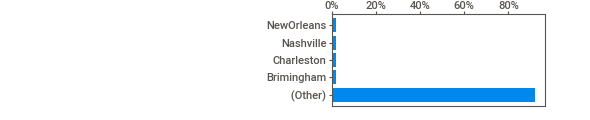
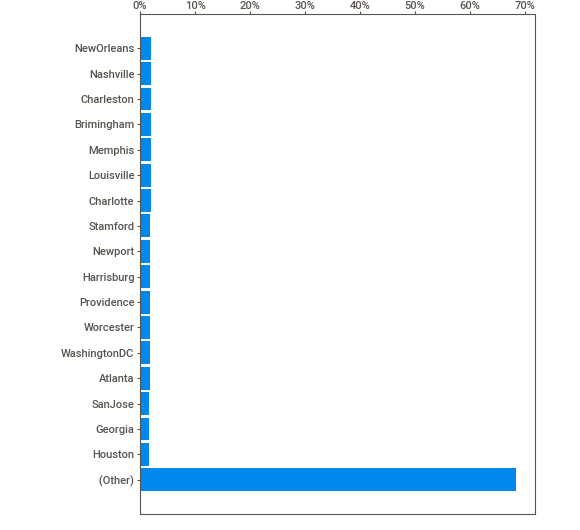
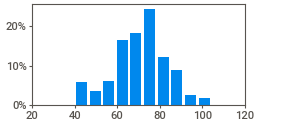
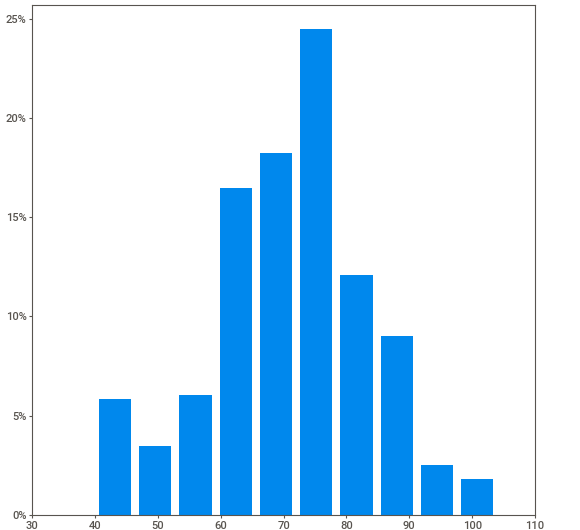
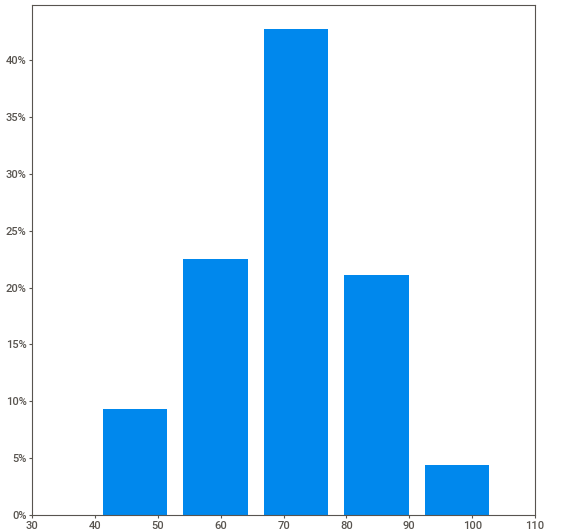
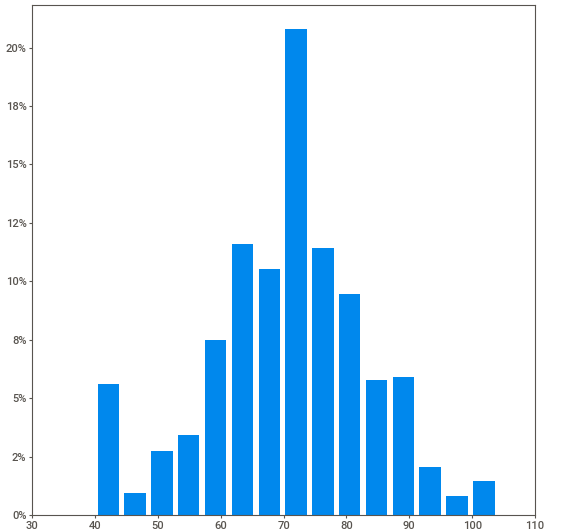
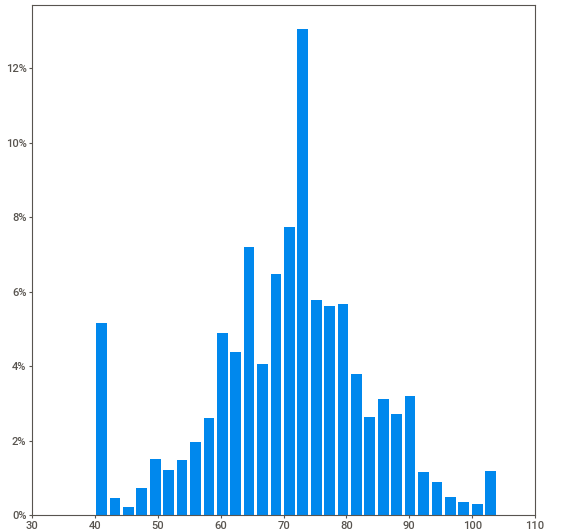
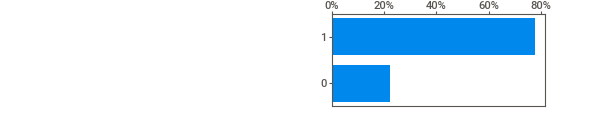
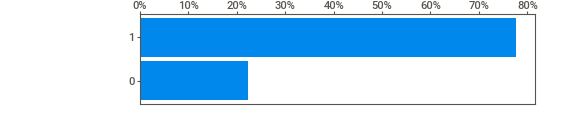
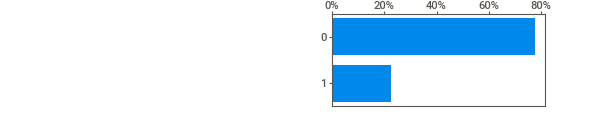
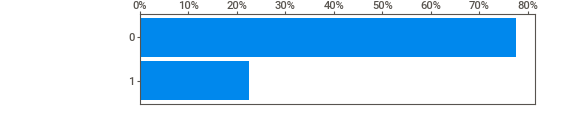
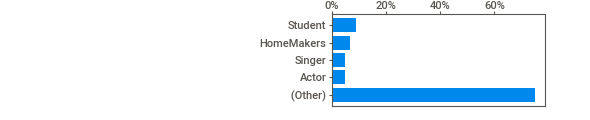
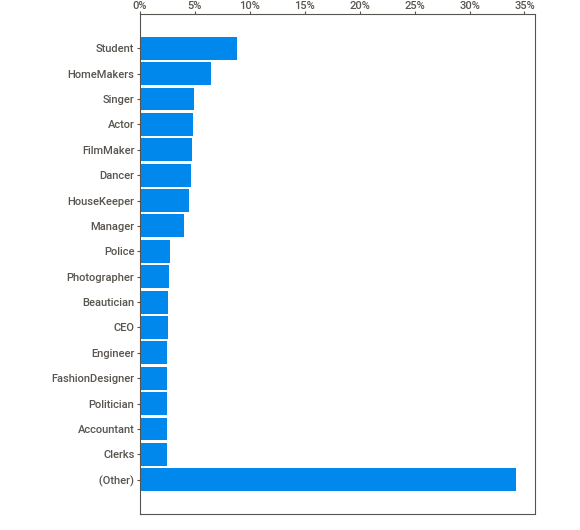
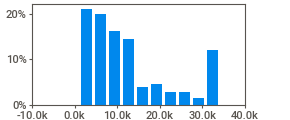
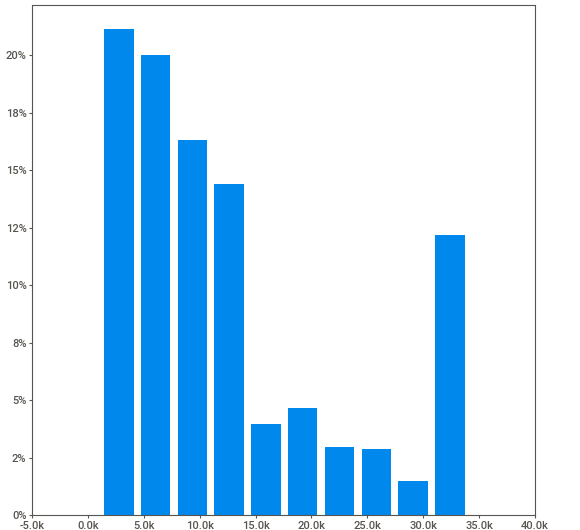
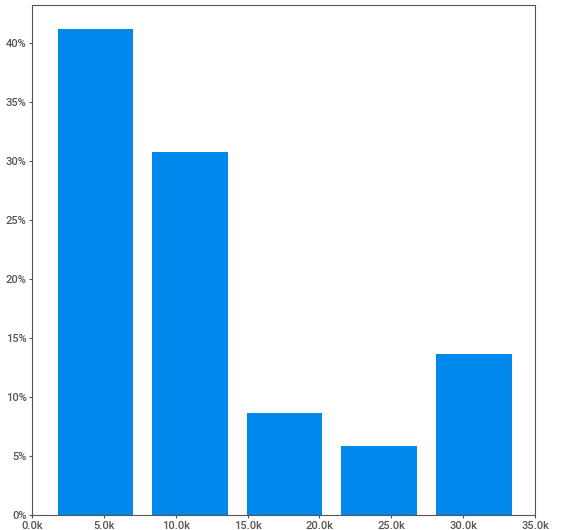
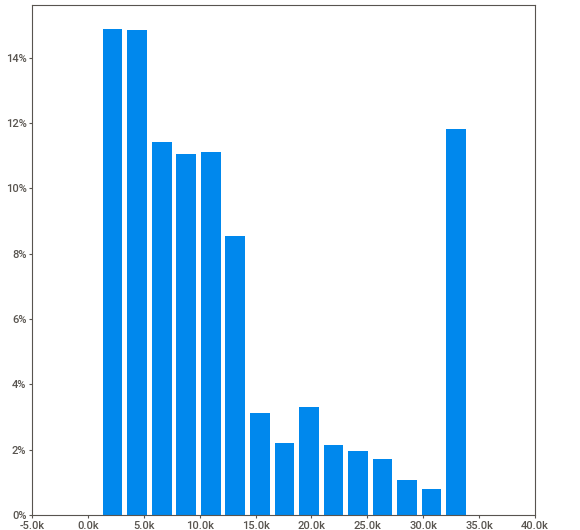
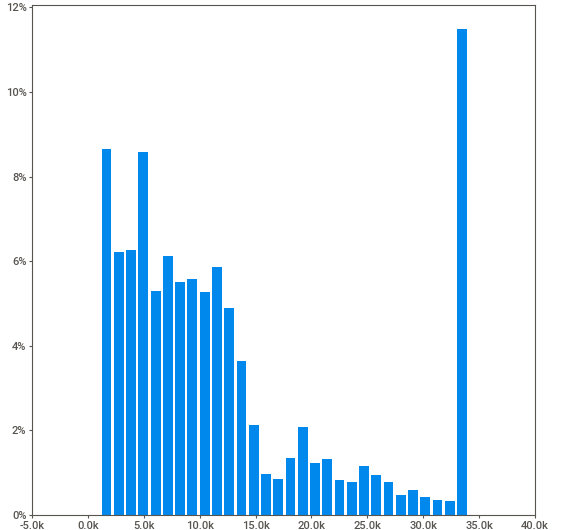
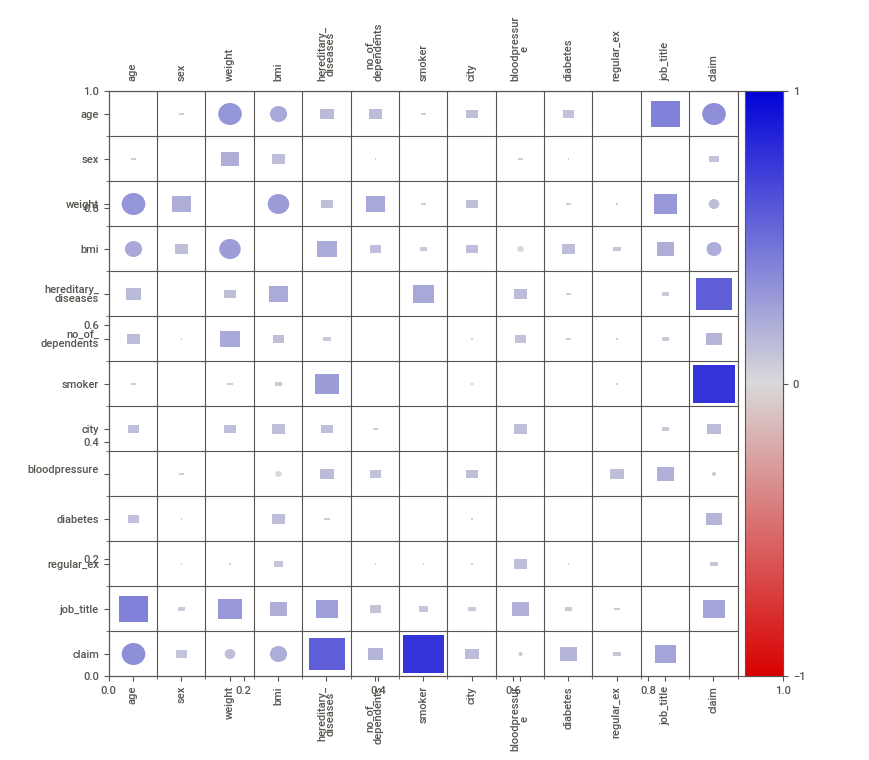
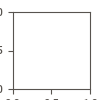

In [9]:
report = sv.analyze(data)

report.show_notebook()

In [10]:
numerical_columns = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'claim']
categorical_columns = ['sex', 'hereditary_diseases', 'city', 'job_title']

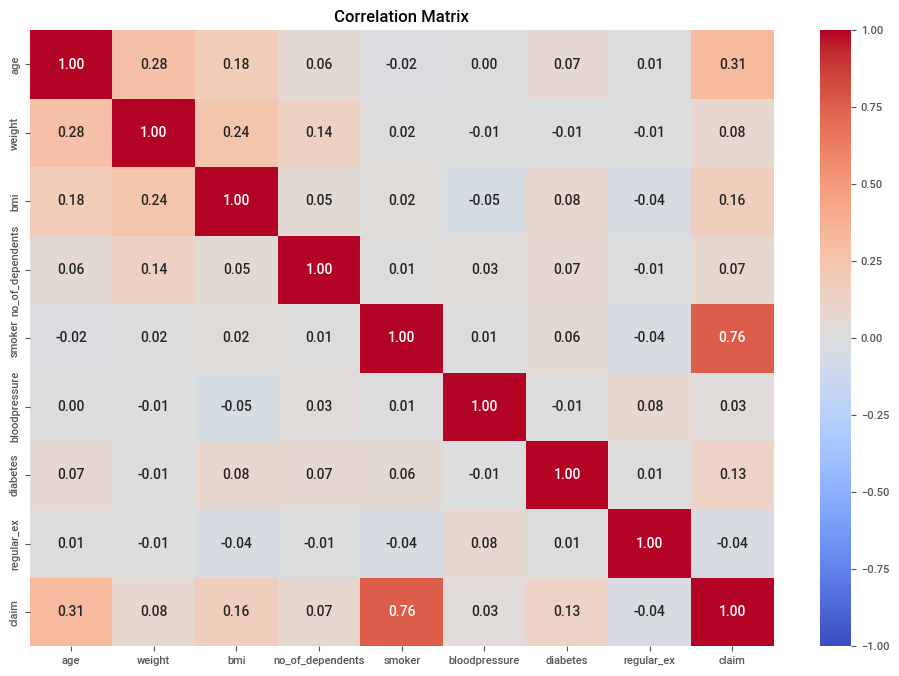

In [11]:
# Compute the correlation matrix
corr_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

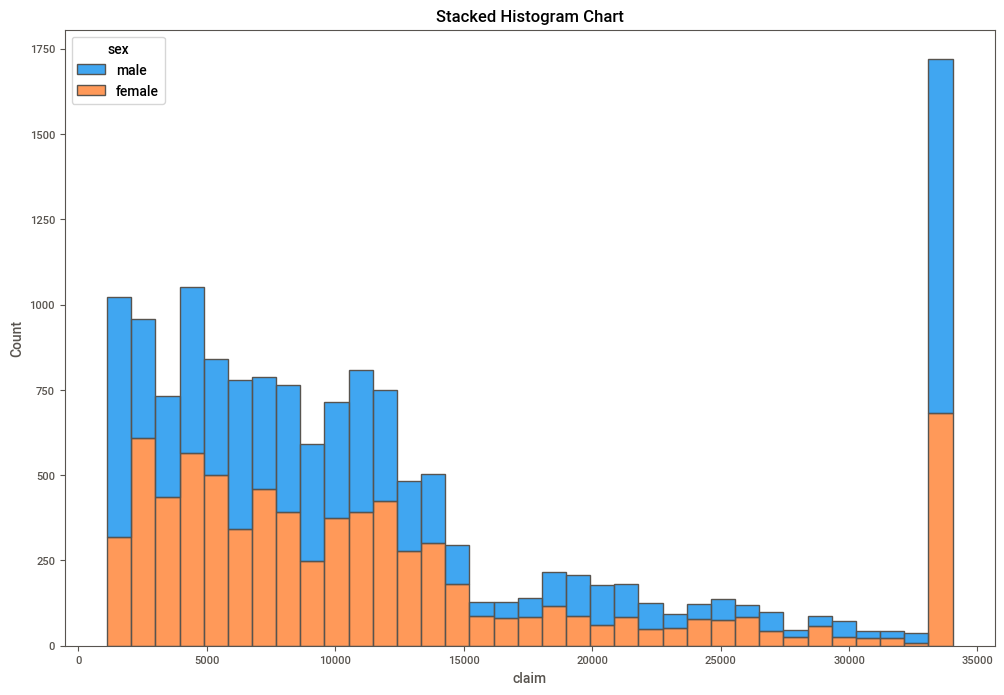

In [12]:
# stacked histogram chart
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='claim', hue='sex', multiple='stack')
plt.title('Stacked Histogram Chart')
plt.show()

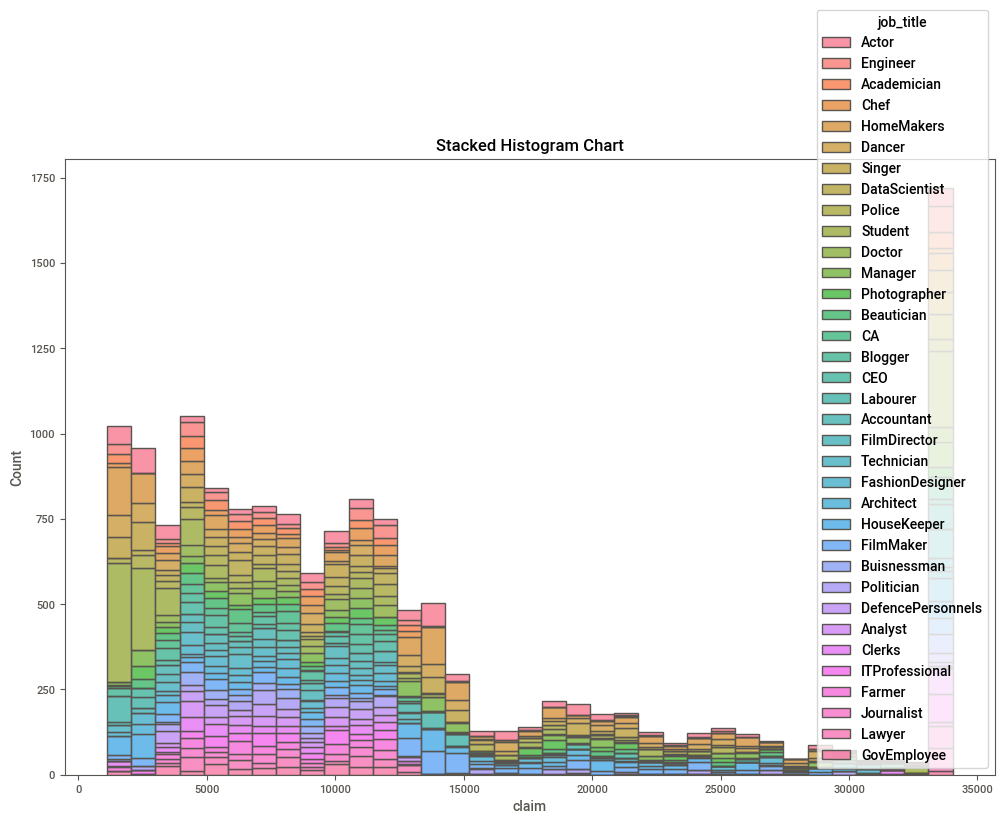

In [13]:
# stacked histogram chart
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='claim', hue='job_title', multiple='stack')
plt.title('Stacked Histogram Chart')
plt.show()

### Cluster Analysis

In [14]:
# cluster analysis using PCA
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

features = data_encoded.drop('claim', axis=1)
target = data_encoded['claim']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Use 2 components for 2D visualization
pca_result = pca.fit_transform(scaled_features)

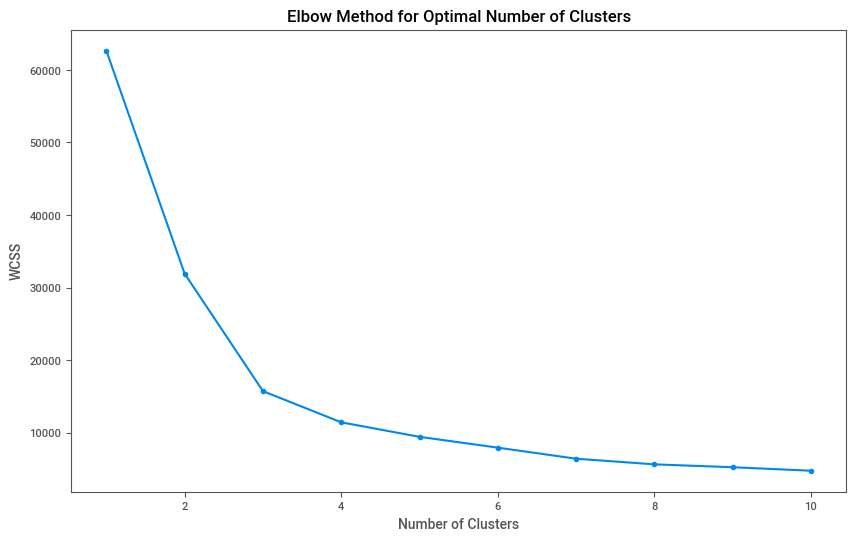

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Testing from 1 to 10 clusters
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

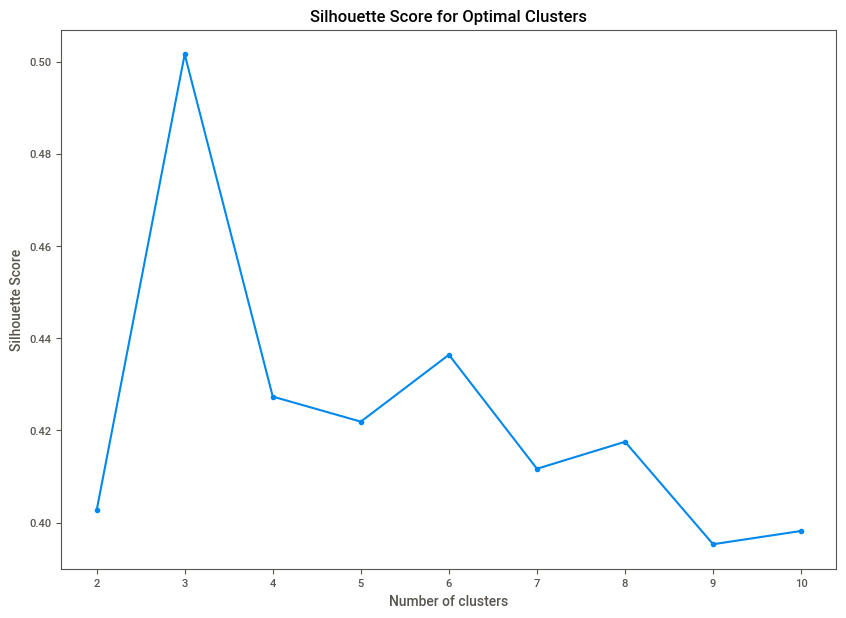

In [17]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):  # At least 2 clusters needed for silhouette score
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [18]:
optimal_clusters = 3  # Replace with the number you determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

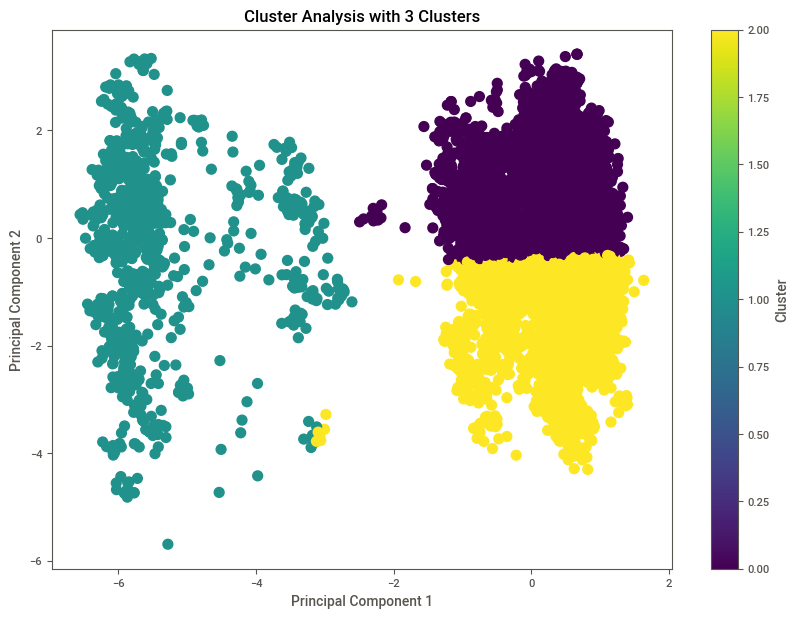

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Cluster Analysis with {optimal_clusters} Clusters')
plt.show()

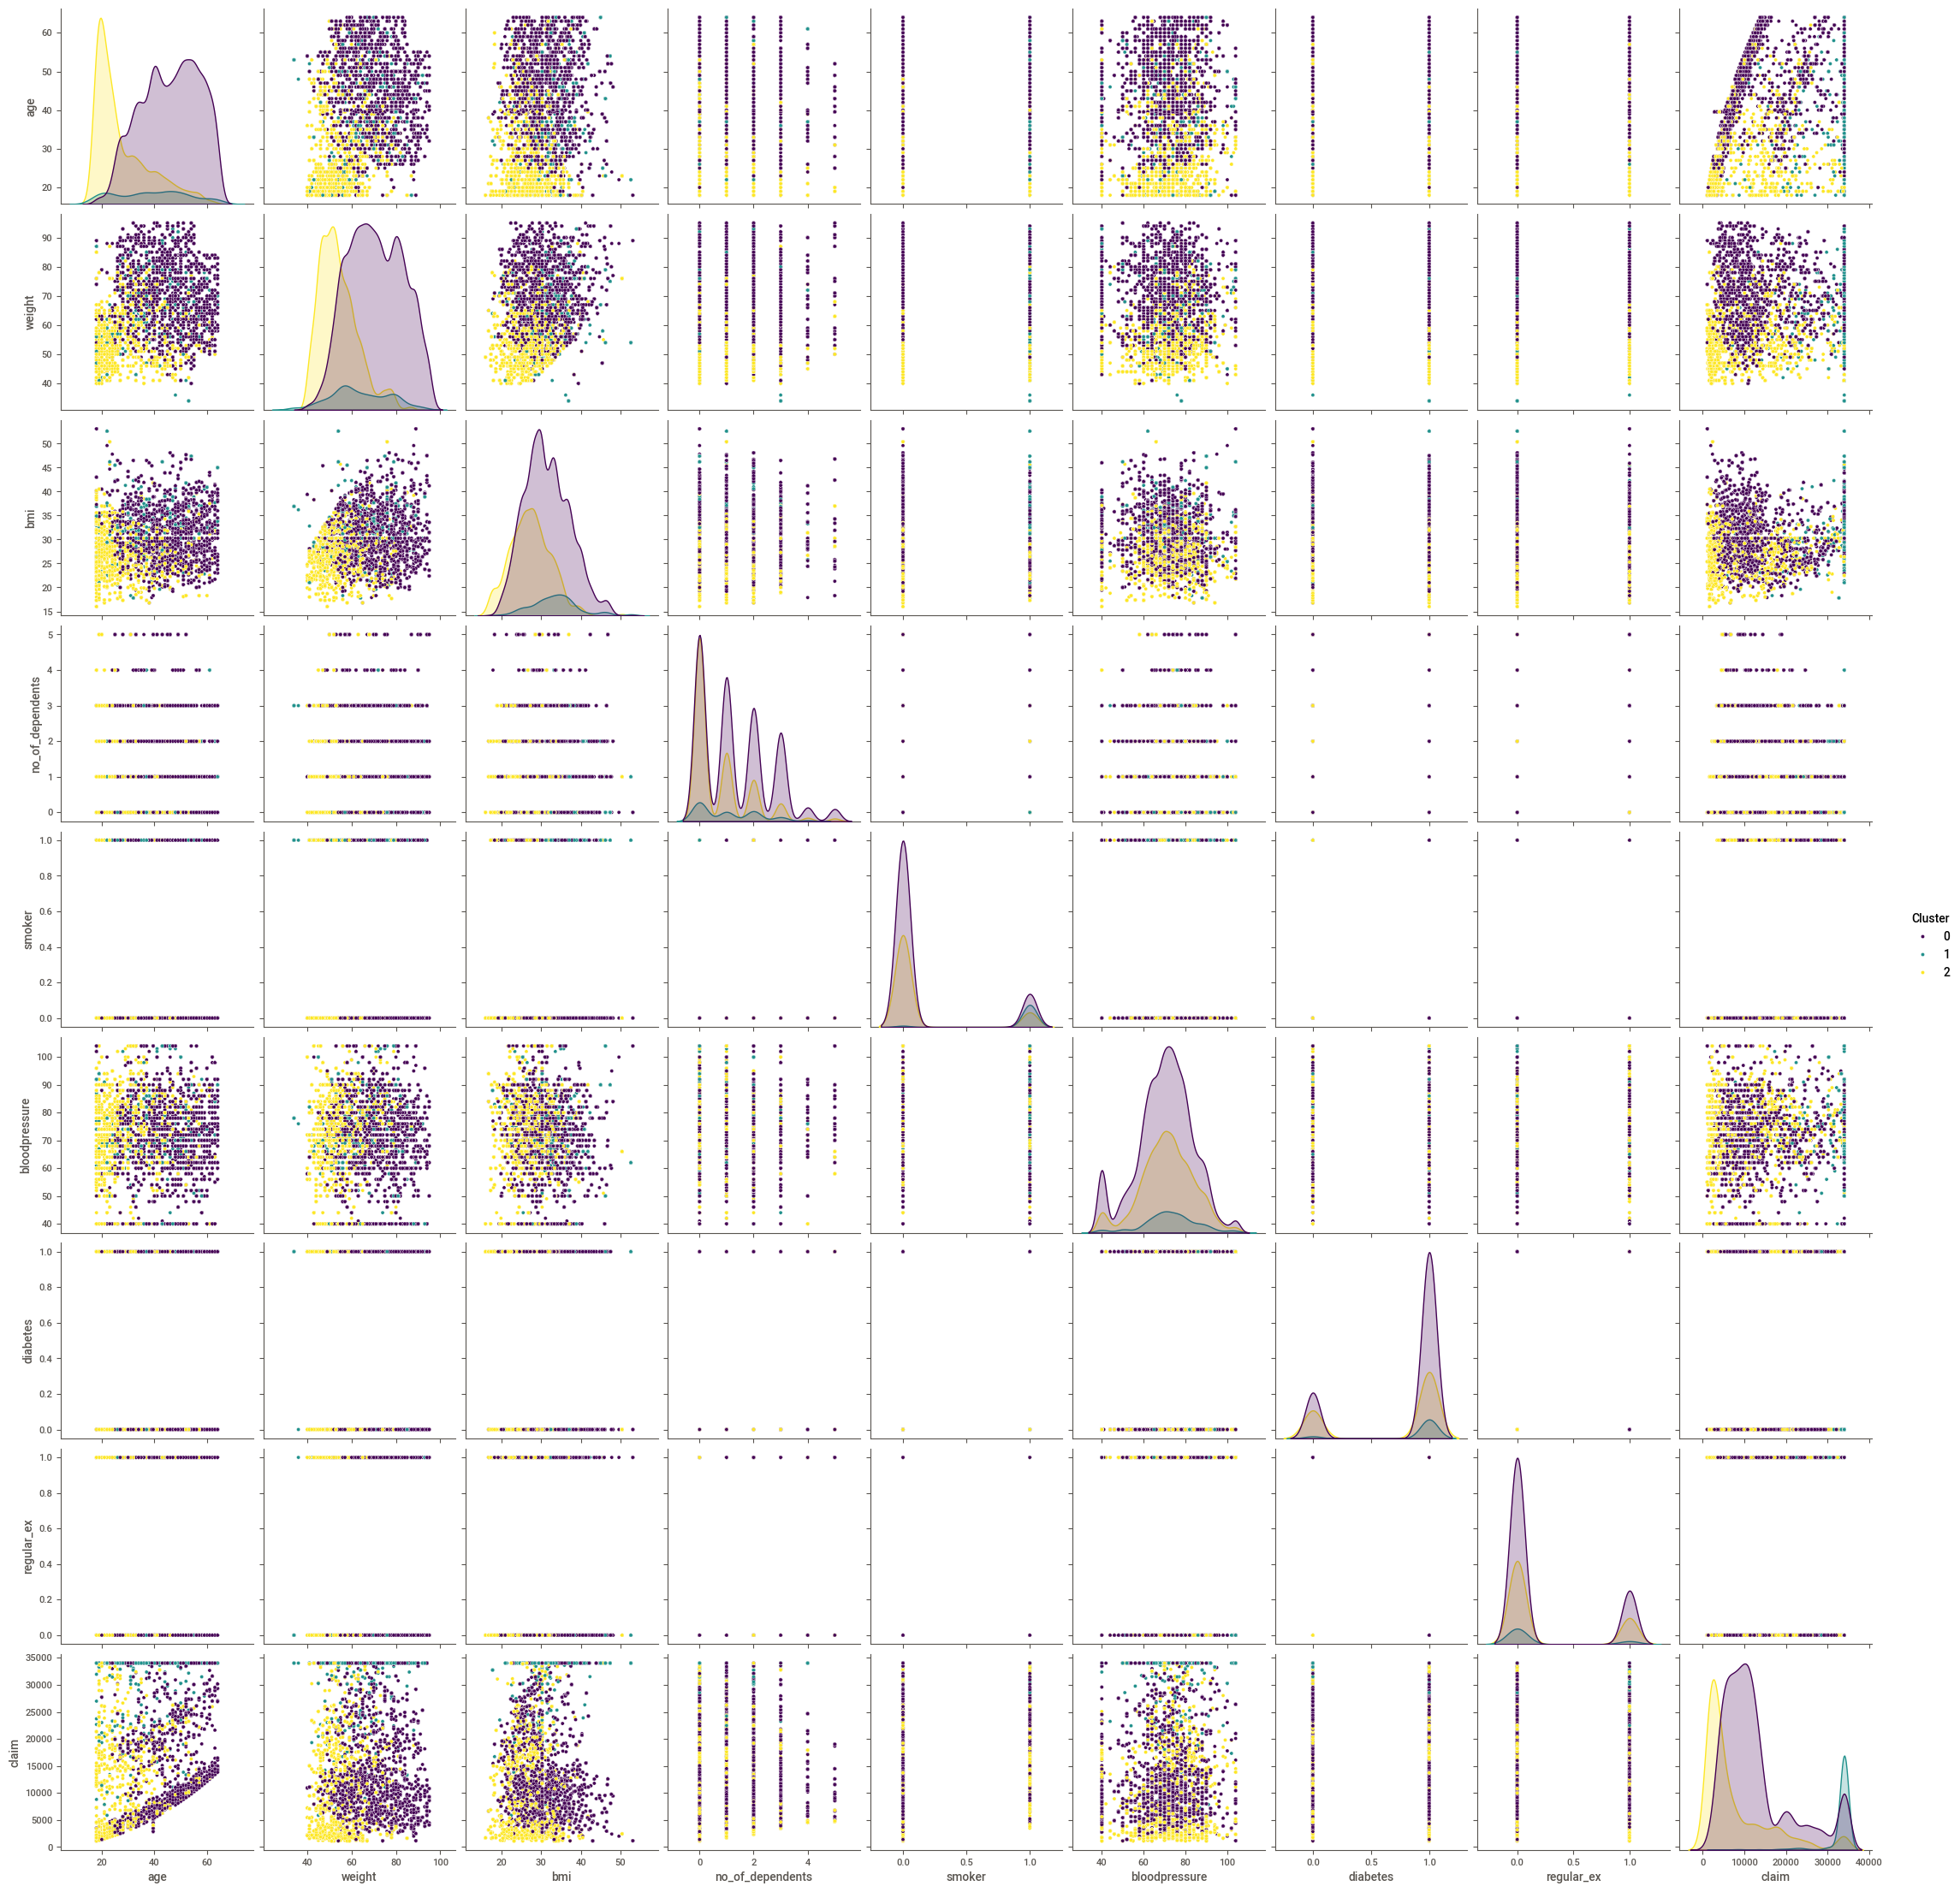

In [20]:
# Add cluster labels to DataFrame
data['Cluster'] = clusters

# Plot pairwise relationships
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

---

## Preprocessing

In [21]:
df = pd.read_csv('data.csv')

<Axes: >

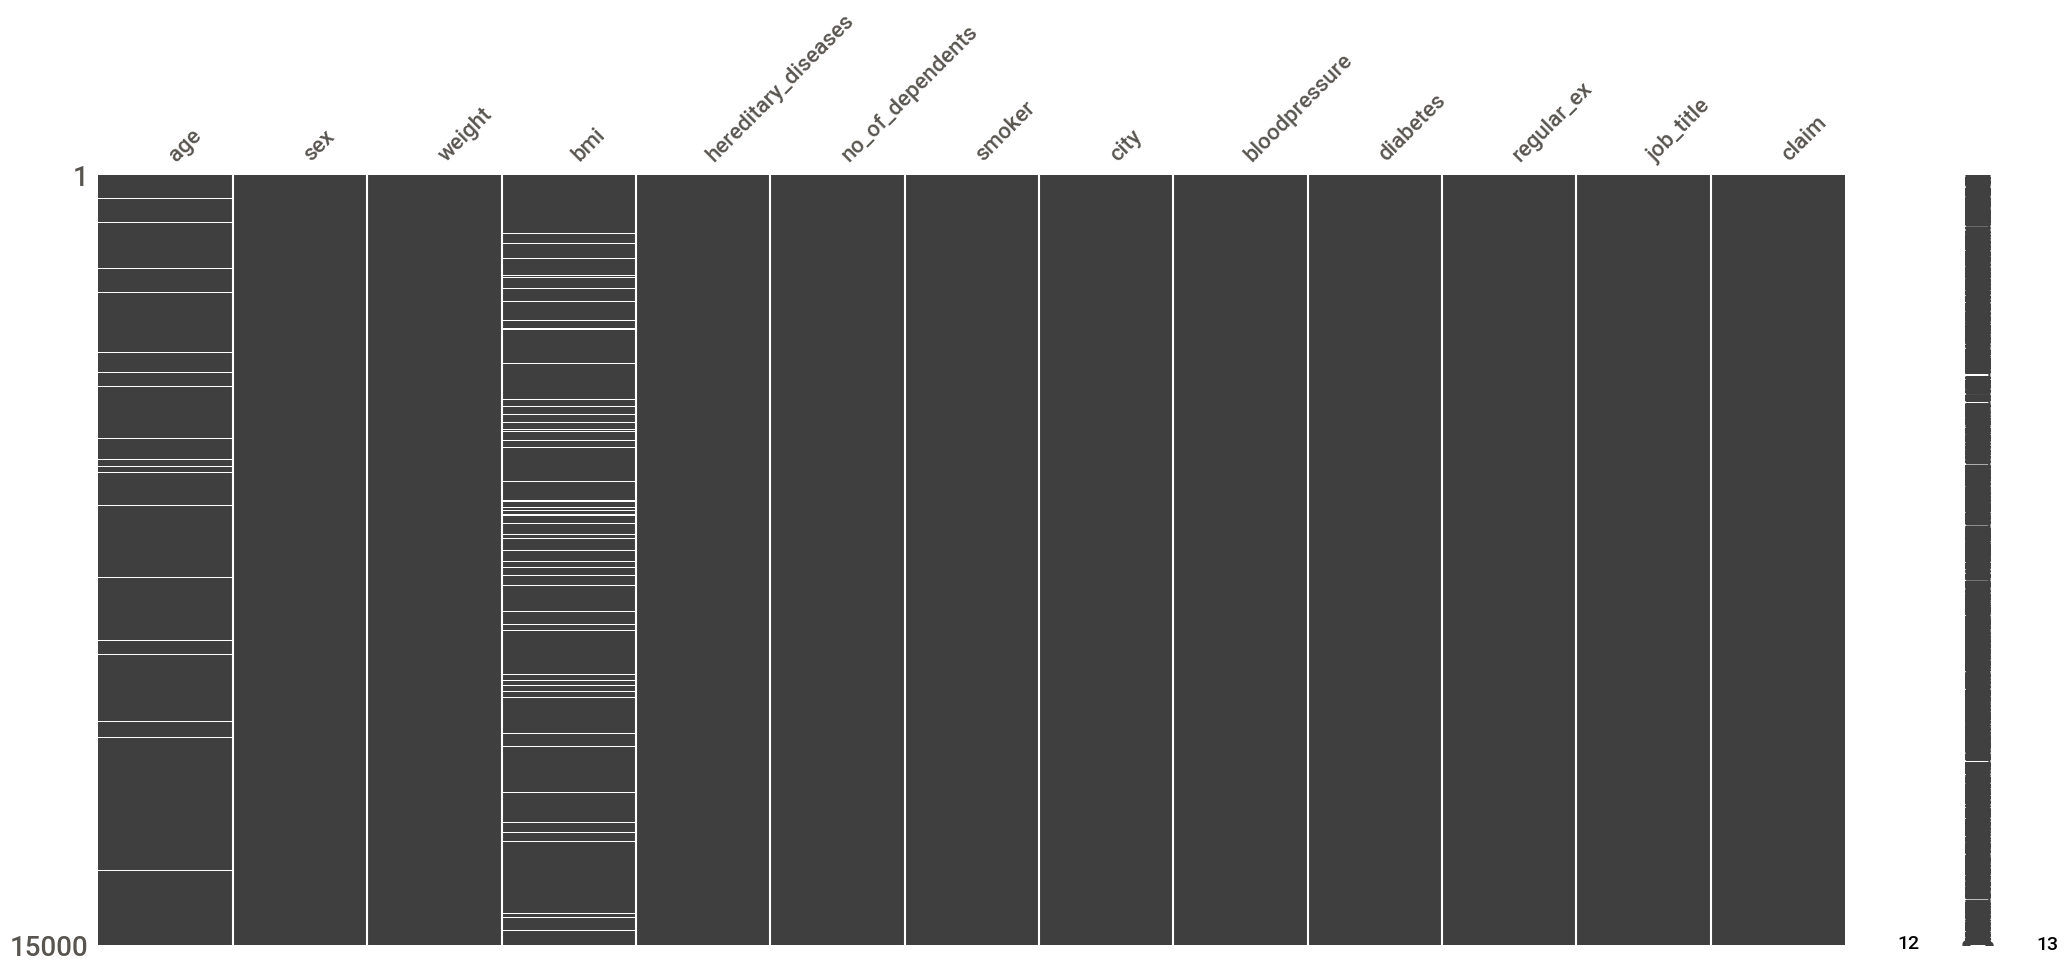

In [22]:
# missing values
import missingno as msno

msno.matrix(df)

In [23]:
# count missing values
df.isna().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from feature_engine.outliers import Winsorizer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
	# ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=list(numerical_columns)))
])
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

---

## Model

In [25]:
X = df.drop('claim', axis=1)
y = df['claim']

In [26]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# models
# linear, ridge, lasso, polynomial, dt, rf, svr, catboost

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor

In [29]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    SVR(),
    CatBoostRegressor(random_seed=42)
]

In [30]:
# remove 'claim' from numerical columns
numerical_columns.remove('claim')
numerical_columns

['age',
 'weight',
 'bmi',
 'no_of_dependents',
 'smoker',
 'bloodpressure',
 'diabetes',
 'regular_ex']

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    print(f'{model.__class__.__name__}: {-scores.mean()}')

LinearRegression: 5961.993482183964
Ridge: 5961.575304302704
Lasso: 5955.024176790865
DecisionTreeRegressor: 2956.3920945181776
RandomForestRegressor: 2385.008312915402
SVR: 12723.506648216873
Learning rate set to 0.05853
0:	learn: 11656.0183477	total: 50.9ms	remaining: 50.8s
1:	learn: 11153.8746170	total: 52.9ms	remaining: 26.4s
2:	learn: 10681.5847973	total: 54.5ms	remaining: 18.1s
3:	learn: 10249.8034258	total: 55.9ms	remaining: 13.9s
4:	learn: 9828.8280614	total: 57.4ms	remaining: 11.4s
5:	learn: 9445.0568589	total: 59.1ms	remaining: 9.8s
6:	learn: 9080.7720602	total: 61.4ms	remaining: 8.71s
7:	learn: 8753.8341092	total: 63.3ms	remaining: 7.85s
8:	learn: 8440.7125762	total: 64.9ms	remaining: 7.14s
9:	learn: 8166.7109522	total: 66.4ms	remaining: 6.57s
10:	learn: 7906.2543826	total: 68.2ms	remaining: 6.13s
11:	learn: 7668.5579077	total: 70ms	remaining: 5.76s
12:	learn: 7440.3454912	total: 71.7ms	remaining: 5.44s
13:	learn: 7236.4171319	total: 73.5ms	remaining: 5.18s
14:	learn: 7053.2

In [32]:
best_models = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    CatBoostRegressor(random_seed=42)
]

### Error Analysis

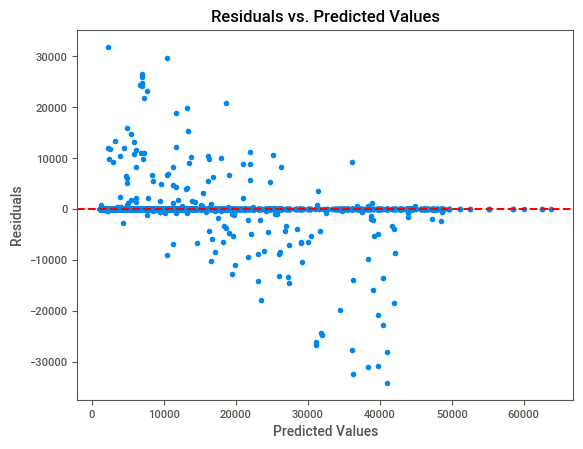

In [38]:
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_models[0])])

pipeline_dt.fit(X_train, y_train)

y_pred_dt = pipeline_dt.predict(X_test)

residuals = y_test - y_pred_dt

plt.scatter(y_pred_dt, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

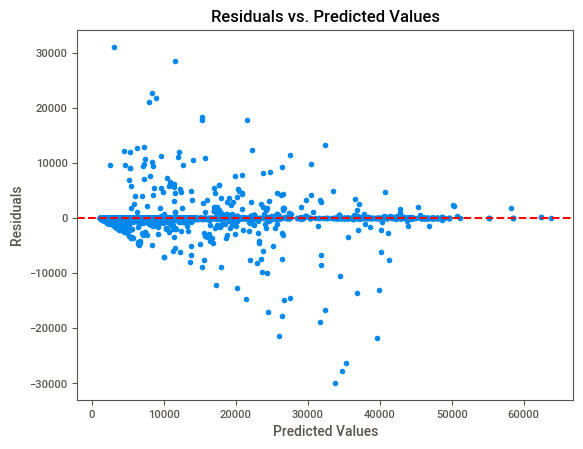

In [39]:
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_models[1])])

pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)

residuals = y_test - y_pred_rf

plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Learning rate set to 0.06063
0:	learn: 11562.7015758	total: 2.03ms	remaining: 2.03s
1:	learn: 11040.1315583	total: 3.71ms	remaining: 1.85s
2:	learn: 10555.4902876	total: 5.43ms	remaining: 1.8s
3:	learn: 10109.7502625	total: 7.29ms	remaining: 1.81s
4:	learn: 9699.3906434	total: 9.8ms	remaining: 1.95s
5:	learn: 9311.9086345	total: 12.1ms	remaining: 2s
6:	learn: 8944.8322490	total: 14.1ms	remaining: 2s
7:	learn: 8618.7928549	total: 15.8ms	remaining: 1.96s
8:	learn: 8310.6896931	total: 17.4ms	remaining: 1.92s
9:	learn: 8032.3426308	total: 19.2ms	remaining: 1.9s
10:	learn: 7772.5785911	total: 22.4ms	remaining: 2.01s
11:	learn: 7527.8815523	total: 24.4ms	remaining: 2s
12:	learn: 7308.3541927	total: 26.3ms	remaining: 1.99s
13:	learn: 7107.9222519	total: 28.3ms	remaining: 1.99s
14:	learn: 6927.5595019	total: 30.3ms	remaining: 1.99s
15:	learn: 6748.9988945	total: 32.2ms	remaining: 1.98s
16:	learn: 6584.1910103	total: 34.1ms	remaining: 1.97s
17:	learn: 6431.9919387	total: 35.9ms	remaining: 1.96s

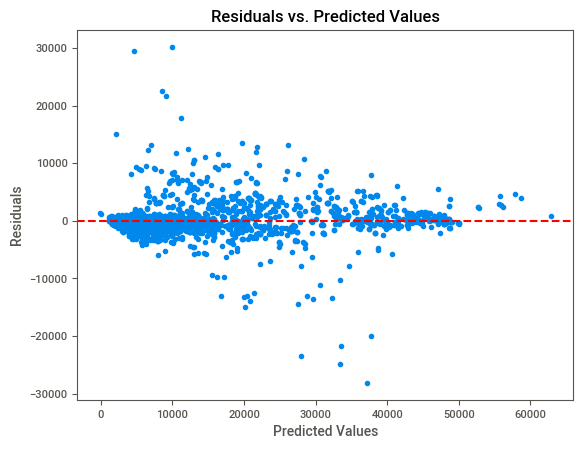

In [40]:
pipeline_cb = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_models[2])])

pipeline_cb.fit(X_train, y_train)

y_pred_cb = pipeline_cb.predict(X_test)

residuals = y_test - y_pred_cb

plt.scatter(y_pred_cb, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

### Ensemble Methods